# DATA MINING PROJECT: Analysis of a Supermarket’s Customers
## 2.3) Clustering Analysis: Others
### *Antonio Strippoli, Valerio Mariani*

In [2]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6MB 5.9MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395105 sha256=689db816b5bcd3d8ae2ff6f182459c02f8c674bf58fcb473d7ea5d2e4d04d474
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
def load_and_scale(range=(0,1)):
    # Load dataset for clustering
    #cdf = pd.read_csv("../DM_25_TASK1/customer_profilation.csv", index_col=0)
    cdf = pd.read_csv("customer_profilation.csv", index_col=0)

    # We choosed these 3 attributes, since they usually classify very well customers
    attr_cluster = ['Recency', 'Frequency', 'Monetary']
    cdf_cluster = cdf[attr_cluster]

    # Normalize values
    scaler = MinMaxScaler(feature_range= range) 
    X = scaler.fit_transform(cdf_cluster.values)

    return X
X = load_and_scale()

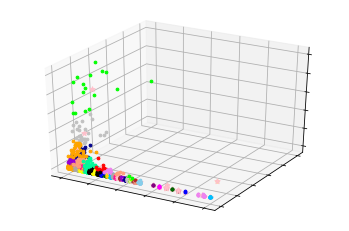

52


In [ ]:
# x-means to automatically determine number of clusters
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Prepare initial center
amount_initial_centers = 1
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 1 cluster, the maximum number of clusters that can be allocated is 100.
xmeans_instance = xmeans(X, initial_centers, 100)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)
visualizer.append_cluster(centers, None, marker='*')
visualizer.show()

print( len(clusters) ) 

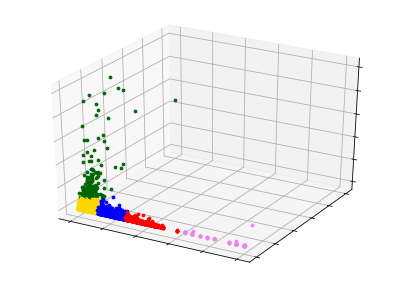

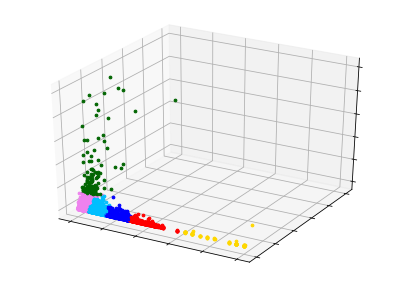

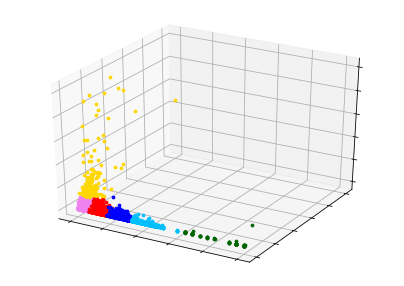

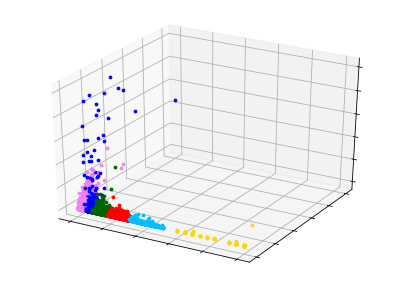

In [72]:
# Fuzzy c-means

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

def test_fcm(n_init_centers, m):
  # initialize
  initial_centers = kmeans_plusplus_initializer(X, n_init_centers, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
  # create instance of Fuzzy C-Means algorithm
  fcm_instance = fcm(X, initial_centers, m=m)
  # run cluster analysis and obtain results
  fcm_instance.process()
  clusters = fcm_instance.get_clusters()
  centers = fcm_instance.get_centers()
  # visualize clustering results
  visualizer = cluster_visualizer()
  visualizer.append_clusters(clusters, X)
  #visualizer.append_cluster(centers, marker='*', markersize=2)
  visualizer.show()

test_fcm(5,2)
test_fcm(6,2.1)
test_fcm(6,2.2)
test_fcm(6,2.5)

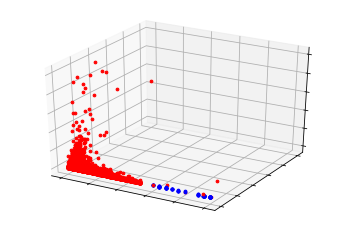

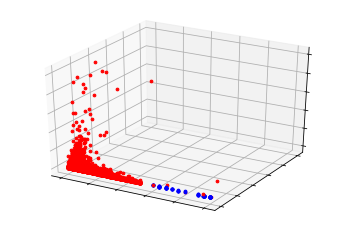

In [ ]:
# EM Expectation Maximization to reach Maximum Likelihood Estimation

from pyclustering.cluster.ema import ema, ema_visualizer
from pyclustering.utils import read_sample

# Create EM istance
ema_instance = ema(X, 5)
# Run clustering process.
ema_instance.process()
# Get clustering results.
clusters = ema_instance.get_clusters()
covariances = ema_instance.get_covariances()
means = ema_instance.get_centers()
# Visualize obtained clustering results.
ema_visualizer.show_clusters(clusters, X, covariances, means)

In [ ]:
%%time
# Genetico
X=load_and_scale(range=(.01,.9)) # bug: contrary to what docs say, interval needs to be included
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer

observer_instance = ga_observer(True, True, True)

# Create genetic algorithm for clustering
ga_instance = genetic_algorithm(data=X,
                                count_clusters=4,# number of clusters
                                chromosome_count=500, # elementi per popolazione
                                population_count=2000, # The amount of populations that essentially defines the amount of iterations. 
                                count_mutation_gens=1,
                                observer = observer_instance)
 
# Start processing
ga_instance.process()
 
# Obtain results and show'em
clusters = ga_instance.get_clusters()
ga_visualizer.show_clusters(X, observer_instance)

# Print n. of clustersstrict
print("Amount of clusters: '%d'" % len(clusters))

X=load_and_scale()

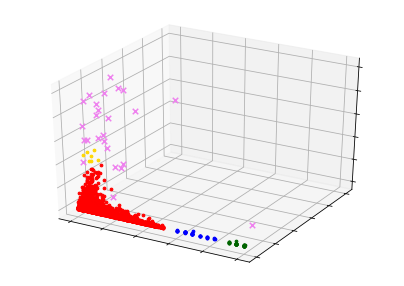

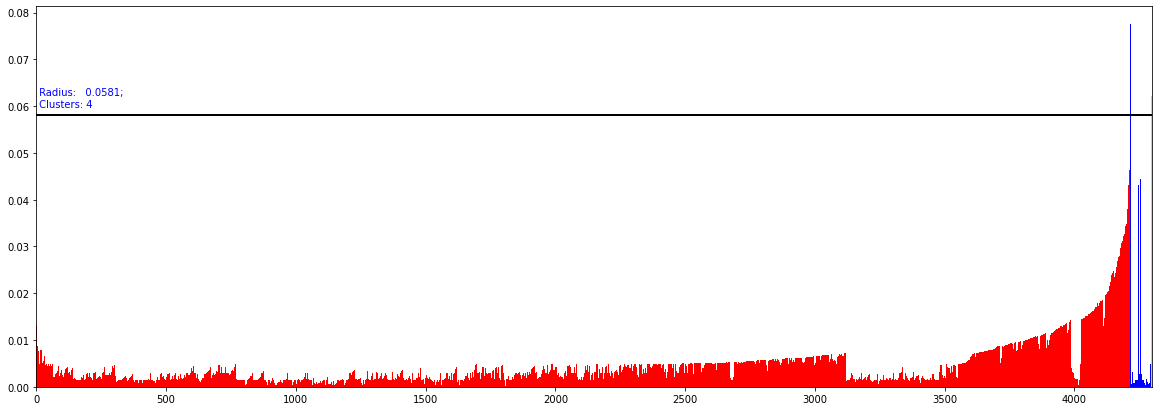

In [78]:
# OPTIC
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
 
# Run cluster analysis where connectivity radius is bigger than real.
radius = 0.08
neighbors = 4
optics_instance = optics(X, radius, neighbors)
 
# Performs cluster analysis.
optics_instance.process()
 
# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

# Visualize clustering results (clusters and outliers).
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)
visualizer.append_cluster(noise, X, marker='x')
visualizer.show()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

# Display ordering.
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser,4)